# Capstone 2 Modeling

In this notebook we will perform modeling step of the data science method. The goal of this step is to develop a final model that effectively predicts our patients' class - 'positive'(1) or 'negative'(0). In the previous step we have already built two models - LogisticRegressionCassifier (which was out baseline model) and RandomForestClassifier. We assesed the performance of each of these models first without tuning and than with hyperparameter tuning using GridSearchCV for LogisticRegression and RandomizedSearchCV for RandomForest and obtained results using classification report. We noticed, that both models performed better with hyperparameter tuning, and RandomForest showed significantly better results in precision, recall and f1-score than LogisticRegression. We also saved our train_test_split as well as both our models as pickle files.

In this step we will built two other models - GradientBoostingClassifier and AdaBoostClassifer, use hyperparameter tuning in order to enhance their performance and compare their results with the results of two above mentioned models that we built durint preprocessing and trainin data development step. 

We will use standard metrics in order to asses our classification models performance - accuracy score, precision, recall and f1-score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import os
import pickle

Now let's load our encoded dataset, train_test_split and two models - RandomForest and LogisticRegression - that we built on preprocessing and training data development step.

In [2]:
df = pd.read_csv('../EDA/Diabetes_EDA.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
#loading train_test_split
with open('../Splits/Train_Test_Split.pkl', 'rb') as tts_pickle:
    tts = pickle.load(tts_pickle)
#loading RandomForestClassifier
with open('../Models/Diabetes_RandFor.pkl', 'rb') as rfc_pickle:
    rfc = pickle.load(rfc_pickle)
#loading LogisticRegression
with open('../Models/Diabetes_LogReg.pkl', 'rb') as lr_pickle:
    lr = pickle.load(lr_pickle)

In [5]:
X_train, X_test, y_train, y_test = tts

In [6]:
#scaling
scaler = StandardScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
rfc

RandomForestClassifier(max_depth=340, max_features='sqrt', n_estimators=600,
                       oob_score=True)

In [8]:
lr

LogisticRegression(random_state=42)

In [9]:
rfc_ypred = rfc.predict(X_test_norm)
lr_ypred = lr.predict(X_test_norm)

Let's see classification reports for each of these models.

In [10]:
print('====== RANDOM FOREST CLASSIFICATION REPORT =====')
print(classification_report(y_test, rfc_ypred))

====== RANDOM FOREST CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [11]:
print('====== LOGISTIC REGRESSION CLASSIFICATION REPORT =====')
print(classification_report(y_test, lr_ypred))

====== LOGISTIC REGRESSION CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



As we know from the previous step, our RandomForestClassifier showed significantly better results than LogisticRegression model. Now we will build two more models. We will start with GradientBoostingClassifier.

Let's initialize our model, fit it to the training set and see how it performs. We will not use any hyperparameter tuning now.

In [12]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_norm, y_train)
gbc_ypred = gbc.predict(X_test_norm)

In [13]:
print('===== GBC ACCURACY SCORE =====')
print(accuracy_score(y_test, gbc_ypred))
print('===== GBC CLASSIFICATION REPORT =====')
print(classification_report(y_test, gbc_ypred))

===== GBC ACCURACY SCORE =====
0.9903846153846154
===== GBC CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



We can conclude that even generic model with no hyperparameters tuning is able to generalize on new data and show great results. However, we will still perform parameters tuning just for the sake of comparing models performance.

In [14]:
gbc.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

As we can see, GradientBoostingClassifier's parameters are very similar to RandomForestClassifier parameters. For our goal we are mostly interested in n_estimators, learning_rate, max_features and max_depth.

In [15]:
#number of trees
n_estimators = [int(i) for i in np.linspace(200, 2000, 10)]

#learning rates
learning_rate = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

#number of features for each split
max_features = ['auto', 'sqrt']

#maximal depth
max_depth = [int(i) for i in np.linspace(100, 500, 11)]

#parameters grid
param_grid = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'max_features':max_features, 'max_depth':max_depth}

In [16]:
# gbc_rand = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)
# gbc_rand.fit(X_train_norm, y_train)

In [17]:
# print(gbc_rand.best_params_)

We obtained the best parameters for our GradientBoostingClassifier. Now let's plug those parameters into our model and asses its performance.

In [18]:
gbc_params = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.05, max_features='sqrt', max_depth = 500, random_state = 42)
gbc_params.fit(X_train_norm, y_train)
gbc_params_ypred = gbc_params.predict(X_test_norm)

In [19]:
print('===== GBC_PARAMS TEST SET ACCURACY SCORE =====')
print(accuracy_score(y_test, gbc_params_ypred))
print('===== GBC_PARAMS TEST SET CLASSIFICATION REPORT =====')
print(classification_report(y_test, gbc_params_ypred))

===== GBC_PARAMS TEST SET ACCURACY SCORE =====
0.9903846153846154
===== GBC_PARAMS TEST SET CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



From the classification report we can see that tuning the model's parameters did not have any significant effect on the scores.

Next, we're going to build AdaBoost model and see how it's going to perform. Again, we will not tune hyperparameters first and will check how the model performs on train and test splits.

In [20]:
abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train_norm, y_train)
abc_ypred = abc.predict(X_test_norm)
print('===== ABC ACCURACY SCORE =====')
print(accuracy_score(y_test, abc_ypred))
print('===== ABC CLASSIFICATION REPORT =====')
print(classification_report(y_test, abc_ypred))

===== ABC ACCURACY SCORE =====
0.9519230769230769
===== ABC CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.92      0.96        64

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104



Now we will tune hyperparameters of AdaBoostingClassifier and check if it's goint to improve model performance.

In [21]:
abc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [22]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "learning_rate": [0.05, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [int(i) for i in np.linspace(200, 2000, 10)]
             }


weak_c = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced", max_depth = 3)

ABC = AdaBoostClassifier(base_estimator = weak_c)

In [23]:
# abc_rand = RandomizedSearchCV(estimator=ABC, param_distributions=param_grid, n_iter=40, cv=5, scoring='roc_auc', random_state=42)
# abc_rand.fit(X_train_norm, y_train)
# print(abc_rand.best_params_)

Let's plug those parameters into the model.

In [24]:
base_est = DecisionTreeClassifier(random_state=42, max_features='auto', class_weight='balanced', max_depth=3, splitter='best', criterion='gini')
abc_params = AdaBoostClassifier(base_estimator=base_est, n_estimators=200, learning_rate=0.1, random_state=42)
abc_params.fit(X_train_norm, y_train)
abc_params_ypred = abc_params.predict(X_test_norm)

In [25]:
print('===== ABC_PARAMS ACCURACY SCORE =====')
print(accuracy_score(y_test, abc_params_ypred))
print('===== ABC_PARAMS CLASSIFICATION REPORT =====')
print(classification_report(y_test, abc_params_ypred))

===== ABC_PARAMS ACCURACY SCORE =====
1.0
===== ABC_PARAMS CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



We can see that hyperparameters tuning on ADABoostClassifier allowed us to achieve perfect score.

Among all models that we built, AdaBoostClassifier showed the highest results - 100% on the test set after hyperparameters tuning. This is the best models we've built so far.

Now, let's build our third model - SupportVectorMachine. For this problem we will use Radial Basis Function kernel.

In [26]:
svmclf = svm.SVC(kernel='rbf')
svmclf.fit(X_train_norm, y_train)
svmclf_ypred = svmclf.predict(X_test_norm)

In [27]:
print('=====SVMCLF ACCURACY SCORE=====')
print(accuracy_score(y_test, svmclf_ypred))
print('=====SVMCLF CLASSIFICATION REPORT=====')
print(classification_report(y_test, svmclf_ypred))

=====SVMCLF ACCURACY SCORE=====
0.9807692307692307
=====SVMCLF CLASSIFICATION REPORT=====
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



From the classification report we can tell that support vector machine with RBF kernel and no hyperparameters tuning shows results that are just slightly worse than those of GradientBoostingClassifier. However, it is still inferior to ADABoostClassifier. Now let's find out the best parameters for our SVM model.

In [28]:
svmclf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

For our SVM with RBF kernel we are mostly interested in two parameters (except 'kernel' itself, of course) - 'C' and 'gamma'.

In [29]:
# C_param = np.logspace(-2, 10, 13)
# gamma_param = np.logspace(-9, 3, 13)
# grid_param = {'C':C_param, 'gamma':gamma_param}
# svmclf_grid = GridSearchCV(svmclf, param_grid=grid_param, cv=5)
# svmclf_grid.fit(X_train_norm, y_train)

In [30]:
# print(svmclf_grid.best_params_)

Now let's plug those parameters into the model.

In [31]:
svmclf_params = svm.SVC(kernel='rbf', C=10.0, gamma=0.1)
svmclf_params.fit(X_train_norm, y_train)
svmclf_params_ypred = svmclf_params.predict(X_test_norm)
print('=====SVMCLF_PARAMS ACCURACY SCORE=====')
print(accuracy_score(y_test, svmclf_params_ypred))
print('=====SVMCLF_PARAMS CLASSIFICATION REPORT=====')
print(classification_report(y_test, svmclf_params_ypred))

=====SVMCLF_PARAMS ACCURACY SCORE=====
0.9807692307692307
=====SVMCLF_PARAMS CLASSIFICATION REPORT=====
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



We can see that hyperparameters tuning did not change the model's performance. We can assume that those parameters we determined using GridSearchCV were used as default parameters in our first SVM model.

Now, let's put our models'results into one table in order to better understand how they performed with respect to each other. We will only use tuned models since they showed better performance than not tuned ones.

| MODEL | ACCURACY | PRECISION (1) | PRECISION (0) | RECALL (1) | RECALL (0) | F1-SCORE (1) | F1-SCORE (0) |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| LogisticRegression | 0.85 | 1.00 | 0.71 | 0.75 | 1.00 | 0.86 | 0.83 |
| RandomForest | 0.98 | 0.98 | 0.97 | 0.98 | 0.97 | 0.98 | 0.97 |
| GradientBoosting | 0.90 | 0.98 | 1.00 | 1.00 | 0.97 | 0.99 | 0.99 |
| ADABoost | 1.00 | 1.00 | 1.00 | 1.00 | 1.00 | 1.00 | 1.00 |
| Support Vector Machine | 0.98 | 0.98 | 0.97 | 0.98 | 0.97 | 0.98 | 0.97 |

#### As we can see from the table above, ADABoostClassifier showed the best - in fact, perfect - scores. In our future work we will use this model.

It is  also important to point out that most of our models showed very good results. Putting our model tuning aside, there is one thing that might have contributed to those results - the dataset might have been artificially composed the way that makes it eaiser to build models with high scores.

Now let's refresh some moments from the EDA. We saved the correlation dataframes as pickle files. Now let's open them. Here are top5 feature-to-target and feature-to-feature correlations in our dataset.

In [32]:
# with open('D:\Tutorials\SDST\My Projects\Capstone2\Correlations\Feature-to-Target.pkl', 'rb') as f_to_t_pickle:
#     f_to_t = pickle.load(f_to_t_pickle)
# with open('D:\Tutorials\SDST\My Projects\Capstone2\Correlations\Feature-to-Feature.pkl', 'rb') as f_to_f_pickle:
#     f_to_f = pickle.load(f_to_f_pickle)

In [33]:
imp_feat = df[['Polyuria', 'Polydipsia', 'Gender', 'sudden weight loss', 'partial paresis', 'class']]
corr_imp = imp_feat.corr()
top_corr_features = corr_imp.index
corr_imp_df = pd.DataFrame(corr_imp)
f_to_t = (corr_imp_df.where(np.triu(np.ones(corr_imp_df.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
corr_imp_df_nt = corr_imp_df.drop('class', axis=1)
f_to_f = (corr_imp_df_nt.where(np.triu(np.ones(corr_imp_df_nt.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [34]:
top_feat_corr = f_to_f[:5]
top_targ_corr = f_to_t[:5]

In [35]:
print('Top F-to-F correlations: \n', top_feat_corr)

Top F-to-F correlations: 
 Polyuria    Polydipsia            0.598609
            sudden weight loss    0.447207
Polydipsia  partial paresis       0.442249
Polyuria    partial paresis       0.441664
Polydipsia  sudden weight loss    0.405965
dtype: float64


In [36]:
print('Top F-to-T correlations: \n', top_targ_corr)

Top F-to-T correlations: 
 Polyuria    class                 0.665922
Polydipsia  class                 0.648734
Polyuria    Polydipsia            0.598609
Gender      class                 0.449233
Polyuria    sudden weight loss    0.447207
dtype: float64


As we know from EDA, our target feature ('class') has the highest correlation with 'Polyuria' (0.67) and 'Polydipsia' (0.65). Those two features are also highly correlated with each other (0.60). 'Polyuria' is correlated with 'sudden weight loss' (0.45) and 'Polydipsia' is correlated with 'partial paresis' (0.44), and target feature 'class' has approximately the same level of correlation with 'Gender' (0.45).

We don't really see a lot of colineraity in our features. However, in order to make sure there is no data leakage, we will perform one more test. 

Let's pick top two features from our Feature-to-Target Correlation list and call them PU ('Polyuria') and PD ('Polydipsia'). We will first drop PU feature from our dataset and train model on it, and evaluate model performance without this feature. We will then do the same with PD feature.

In [37]:
df_no_PU = df.drop('Polyuria', axis=1)

In [38]:
X_no_PU = df_no_PU.drop('class', axis=1)
y_no_PU = df_no_PU['class']

In [39]:
X_train_no_PU, X_test_no_PU, y_train_no_PU, y_test_no_PU = train_test_split(X_no_PU, y_no_PU, test_size=0.2, stratify=y_no_PU, random_state=42)
X_train_no_PU = pd.DataFrame(scaler.fit_transform(X_train_no_PU), columns=X_train_no_PU.columns)
X_test_no_PU = pd.DataFrame(scaler.transform(X_test_no_PU), columns = X_test_no_PU.columns)

In [40]:
abc_no_PU = AdaBoostClassifier(base_estimator=base_est, n_estimators=200, learning_rate=0.1, random_state=42)
abc_no_PU.fit(X_train_no_PU, y_train_no_PU)
abc_no_PU_ypred = abc_no_PU.predict(X_test_no_PU)
print('===== ABC_NO_PU ACCURACY SCORE =====')
print(accuracy_score(y_test_no_PU, abc_no_PU_ypred))
print('===== ABC_NO_PU CLASSIFICATION REPORT =====')
print(classification_report(y_test_no_PU, abc_no_PU_ypred))

===== ABC_NO_PU ACCURACY SCORE =====
0.9807692307692307
===== ABC_NO_PU CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



Dropping 'Polyuria' feature led to the accuracy drop of 0.02%, precision(0) drop of 0.05%, recall(1) drop of 0.03% and f1-score drop of 0.02%. Overall, our model still shows great results.

Now, let's drop 'Polydipsia' feature.

In [41]:
df_no_PD = df.drop('Polydipsia', axis=1)
X_no_PD = df_no_PD.drop('class', axis=1)
y_no_PD = df_no_PD['class']
X_train_no_PD, X_test_no_PD, y_train_no_PD, y_test_no_PD = train_test_split(X_no_PD, y_no_PD, test_size=0.2, stratify=y_no_PD, random_state=42)
X_train_no_PD = pd.DataFrame(scaler.fit_transform(X_train_no_PD), columns=X_train_no_PD.columns)
X_test_no_PD = pd.DataFrame(scaler.transform(X_test_no_PD), columns = X_test_no_PD.columns)

In [42]:
abc_no_PD = AdaBoostClassifier(base_estimator=base_est, n_estimators=200, learning_rate=0.1, random_state=42)
abc_no_PD.fit(X_train_no_PD, y_train_no_PD)
abc_no_PD_ypred = abc_no_PD.predict(X_test_no_PD)
print('===== ABC_NO_PD ACCURACY SCORE =====')
print(accuracy_score(y_test_no_PD, abc_no_PD_ypred))
print('===== ABC_NO_PD CLASSIFICATION REPORT =====')
print(classification_report(y_test_no_PD, abc_no_PD_ypred))

===== ABC_NO_PD ACCURACY SCORE =====
0.9807692307692307
===== ABC_NO_PD CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



Dropping 'Polydipsia' feature led to exact same results as dropping 'Poluyria'. It makes total sense, considering the fact that their correlation with the target feature is almost identical with the difference of only 0.01%.

Now we will continues to drop feature columns. We know that our 'Polyuria' and 'Polydipsia' are correlated the most with each other, among all the exploratory variables. However, we already know how our model perform without them, so we will pick those two features whose correlation with each other are second-highest - 'Gender' and 'partial paresis' (0.33).

'Gender' feature's name will be 'G' and 'partial paresis' feature's name will be 'PP'.

In [43]:
df_no_G = df.drop('Gender', axis=1)
X_no_G = df_no_G.drop('class', axis=1)
y_no_G = df_no_G['class']
X_train_no_G, X_test_no_G, y_train_no_G, y_test_no_G = train_test_split(X_no_G, y_no_G, test_size=0.2, stratify=y_no_G, random_state=42)
X_train_no_G = pd.DataFrame(scaler.fit_transform(X_train_no_G, y_train_no_G), columns=X_train_no_G.columns)
X_test_no_G = pd.DataFrame(scaler.transform(X_test_no_G), columns=X_test_no_G.columns)

In [44]:
abc_no_G = AdaBoostClassifier(base_estimator=base_est, n_estimators=200, learning_rate=0.1, random_state=42)
abc_no_G.fit(X_train_no_G, y_train_no_G)
abc_no_G_ypred = abc_no_G.predict(X_test_no_G)
print('===== ABC_NO_G ACCURACY SCORE =====')
print(accuracy_score(y_test_no_G, abc_no_G_ypred))
print('===== ABC_NO_G CLASSIFICATION REPORT =====')
print(classification_report(y_test_no_G, abc_no_G_ypred))

===== ABC_NO_G ACCURACY SCORE =====
0.9807692307692307
===== ABC_NO_G CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



Dropping 'Gender' feature led to 0.03% drop in all metrics with respect to target class '0' ('negative') and 0.02% drop with respect to class '1' ('positive'). Accuracy also dropped on 0.02%

Now, let's remove 'partial paresis' feature from our dataset.

In [45]:
df_no_PP = df.drop('partial paresis', axis=1)
X_no_PP = df_no_PP.drop('class', axis=1)
y_no_PP = df_no_PP['class']
X_train_no_PP, X_test_no_PP, y_train_no_PP, y_test_no_PP = train_test_split(X_no_PP, y_no_PP, test_size=0.2, stratify=y_no_PP, random_state=42)
X_train_no_PP = pd.DataFrame(scaler.fit_transform(X_train_no_PP, y_train_no_PP), columns=X_train_no_PP.columns)
X_test_no_PP = pd.DataFrame(scaler.transform(X_test_no_PP), columns=X_test_no_PP.columns)

In [46]:
abc_no_PP = AdaBoostClassifier(base_estimator=base_est, n_estimators=200, learning_rate=0.1, random_state=42)
abc_no_PP.fit(X_train_no_PP, y_train_no_PP)
abc_no_PP_ypred = abc_no_PP.predict(X_test_no_PP)
print('===== ABC_NO_PP ACCURACY SCORE =====')
print(accuracy_score(y_test_no_PP, abc_no_PP_ypred))
print('===== ABC_NO_PP CLASSIFICATION REPORT =====')
print(classification_report(y_test_no_PP, abc_no_PP_ypred))

===== ABC_NO_PP ACCURACY SCORE =====
0.9711538461538461
===== ABC_NO_PP CLASSIFICATION REPORT =====
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       1.00      0.95      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



Dropping 'partial paresis' feature led to accuracy drop of 0.03%. Other metrics also showed some drop.

### However, none of the features we dropped made our model significantly worsen its performance. From that fact we can derive that there is no data leakage in our model and no colinearity in our data which could negatively affect the model's performance.

Now, after we made sure our model is robust and consistently shows good results, we want to know what features have most importance for the model. We will perform feature impact analysis for our LogisticRegression model and permutation feature importance analysis for all the tree-based algorithms (RandomForest, GradientBoosting and ADABoost).

As we know, in logistic regression prediction is a weighted sum of the input values. For the feature impact analysis we will find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients will be our feature importance scores for the model.

The permutation feature importance is the decrease in a model score when a single feature value is randomly shuffled. Shuffling a feature breaks its relatiomship with the target thus changing the model performance. If the change is significant then the feature is important.

We will start with LogisticRegression.

In [47]:
lr.fit(X_train_norm, y_train);

Feature: 0, Score: -0.40357
Feature: 1, Score: 1.78744
Feature: 2, Score: 1.61094
Feature: 3, Score: 1.92922
Feature: 4, Score: 0.25534
Feature: 5, Score: 0.24667
Feature: 6, Score: 0.55142
Feature: 7, Score: 0.55761
Feature: 8, Score: 0.31655
Feature: 9, Score: -1.06949
Feature: 10, Score: 0.80936
Feature: 11, Score: -0.06380
Feature: 12, Score: 0.44703
Feature: 13, Score: -0.31882
Feature: 14, Score: -0.06079
Feature: 15, Score: -0.11211


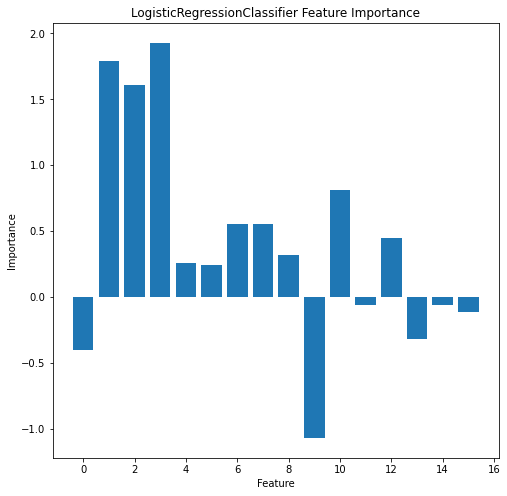

In [48]:
#calculating importances
lr_importance = lr.coef_[0]
for f,s in enumerate(lr_importance):
    print('Feature: %0d, Score: %.5f' %(f,s))
#plotting importances
plt.figure(figsize=(8,8))
plt.bar([x for x in range(len(lr_importance))], lr_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('LogisticRegressionClassifier Feature Importance')
plt.show();

Those features that have positive sign contribute to being classified as '1', and those with negative - as '0'. From the barplot we can tell that three most important features for class '1' are features 3 ('Polydipsia'), 1 ('Gender') and 2 ('Polyuria'). The feature that is most important for class '0' is feature 9 ('Itching').

It is important to note that the coefficients we got ARE NOT the intrinsic importance of those feaure values in general, but their importance FOR THIS PARTICULAR LogisticRegression model.

Now, let's move to RandomForest model.

Feature: 0, Score: 0.10307
Feature: 1, Score: 0.11421
Feature: 2, Score: 0.20998
Feature: 3, Score: 0.18564
Feature: 4, Score: 0.06078
Feature: 5, Score: 0.01882
Feature: 6, Score: 0.02844
Feature: 7, Score: 0.02242
Feature: 8, Score: 0.02591
Feature: 9, Score: 0.03081
Feature: 10, Score: 0.03701
Feature: 11, Score: 0.03342
Feature: 12, Score: 0.04536
Feature: 13, Score: 0.02140
Feature: 14, Score: 0.04312
Feature: 15, Score: 0.01961


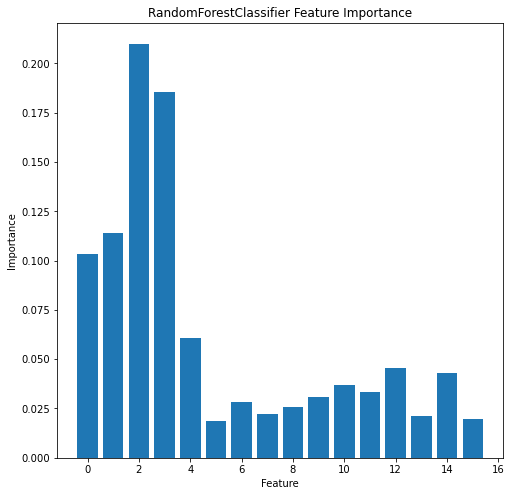

In [49]:
rfc_importance = rfc.feature_importances_
for f,s in enumerate(rfc_importance):
    print('Feature: %0d, Score: %.5f' %(f,s))
plt.figure(figsize=(8,8))
plt.bar([x for x in range(len(rfc_importance))], rfc_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('RandomForestClassifier Feature Importance')
plt.show();

Here we see same three features having the biggest impact. However, the order is different now - 'Polyuria' and 'Polydipsia' having significantly higher importance then the 'Gender'.

It's important to note that we only see the magnitued of feature importances, but we can't tell if they contribute to class '1' or class '0'.

Let's move on to GradientBossting model.

Feature: 0, Score: 0.10253
Feature: 1, Score: 0.10712
Feature: 2, Score: 0.19898
Feature: 3, Score: 0.17738
Feature: 4, Score: 0.07056
Feature: 5, Score: 0.01507
Feature: 6, Score: 0.05138
Feature: 7, Score: 0.02548
Feature: 8, Score: 0.03447
Feature: 9, Score: 0.02367
Feature: 10, Score: 0.02761
Feature: 11, Score: 0.04210
Feature: 12, Score: 0.03438
Feature: 13, Score: 0.02452
Feature: 14, Score: 0.04217
Feature: 15, Score: 0.02257


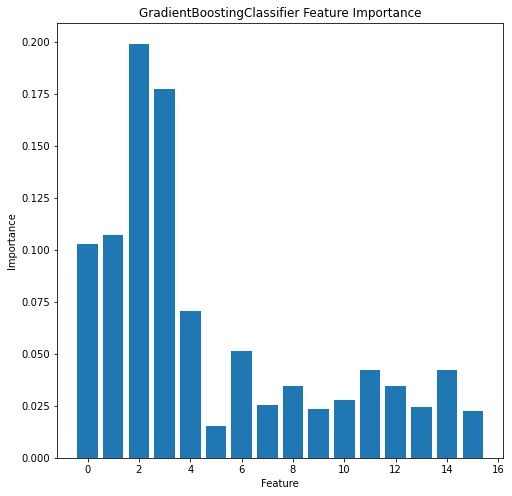

In [50]:
gbc_importance = gbc_params.feature_importances_
for f,s in enumerate(gbc_importance):
    print('Feature: %0d, Score: %.5f' %(f,s))
plt.figure(figsize=(8,8))
plt.bar([x for x in range(len(gbc_importance))], gbc_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('GradientBoostingClassifier Feature Importance')
plt.show();

Since GradientBoosting is a version of RandomForest, we would assume that the results they show should not be very different. We can see from the graph that this assumption is correct, and our GradientBoosting model showed almost identical results as RandomForestClassifier. 

Now, let's proceed to ADABoostClassifier.

Feature: 0, Score: 0.22989
Feature: 1, Score: 0.30032
Feature: 2, Score: 0.02277
Feature: 3, Score: 0.02680
Feature: 4, Score: 0.03632
Feature: 5, Score: 0.04495
Feature: 6, Score: 0.02664
Feature: 7, Score: 0.03520
Feature: 8, Score: 0.02416
Feature: 9, Score: 0.05420
Feature: 10, Score: 0.03962
Feature: 11, Score: 0.04386
Feature: 12, Score: 0.01688
Feature: 13, Score: 0.03280
Feature: 14, Score: 0.05675
Feature: 15, Score: 0.00885


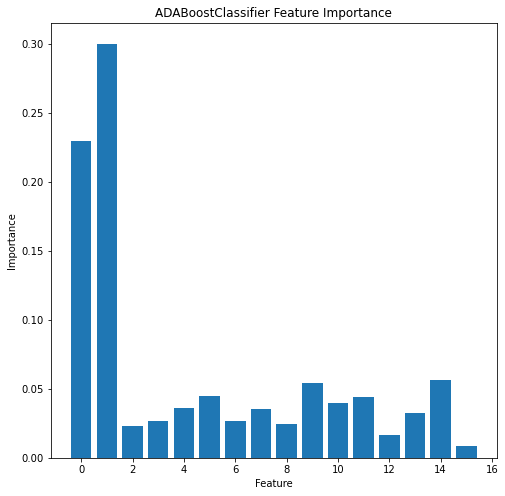

In [51]:
abc_importance = abc_params.feature_importances_
for f,s in enumerate(abc_importance):
    print('Feature: %0d, Score: %.5f' %(f,s))
plt.figure(figsize=(8,8))
plt.bar([x for x in range(len(abc_importance))], abc_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('ADABoostClassifier Feature Importance')
plt.show();

Interestingly enough, ADABoost shows completely different results. The most important features are feature 0 ('Age') and feature 1 ('Gender').

We also built SupportVectorMachine classifier. However, since we did not use linear kernel, it is impossible to get feature importance from that model.

## Conclusion

In this notebook we performed Modeling step of the Data Science method. We loaded and tuned models we built in the previous step and also built 3 additional model - GradientBoostingClassifier, ADABoostClassifier and SupportVectorMachines. We assesed models' performance and picked the one that showed the best results. In our case it was ADABoostClassifier, which, after hyperparameter tuning showed perfect scores. It is a very unusual result which might be due to the dataset and the way it was composed. Then we made sure there was no colinearity in the data and no redundant features. After that we performed feature impact and feature importance analysis. Most of the models showed three features to be the most important ('Polyuria', 'Polydipsia', 'Gender'), however, ADABoostClassifier showed 'Age' and 'Gender' to be the most important. It is also should be pointed out that the actual coefficients of those features in the Tree-Based Algorithms were low, with the highest being 0.3. In LogisticRegressionClassifier those features showed significanlty higher scores.

After performing all the tests it would be reasonable to assume that 'Polyuria', 'Polydipsia' and 'Gender' are top-3 features that could be used for predicting diabetes.